In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Use citipy module to determine city based on latitude and longitude
from citipy import citipy

In [5]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

597

Get city weather data
-----------------------

In [6]:
# Import the requests library
import requests

# Import the API key from the config file
from config import weather_api_key

In [7]:
# Starting URL or Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=19e9ac8c8ebbadf43ace8282f95ee1ad


In [8]:
# Import the datetime module from the datetime library
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of hte logging
print("Beginning Data Retrieval    ")
print("----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1 #Should this be incrementing??
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to record count
    record_count += 1
    
    # ------------------------------------
    # Run an API request for each of teh cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        
        # Append the city information into city_data list
        city_data.append({"City":city.title(),
                         "Lat":city_lat,
                         "Lng":city_lng,
                         "Max Temp":city_max_temp,
                         "Humidity":city_humidity,
                         "Cloudiness":city_clouds,
                         "Wind Speed":city_wind,
                         "Country":city_country,
                         "Date":city_date})
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
        
# Indicate that data loading is complete
print("---------------------------")
print("Data Retrieval Complete    ")
print("---------------------------")

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | luderitz
Processing Record 3 of Set 1 | nanortalik
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 6 of Set 1 | dikson
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | flin flon
Processing Record 9 of Set 1 | dekar
Processing Record 10 of Set 1 | kavaratti
Processing Record 11 of Set 1 | alta floresta
Processing Record 12 of Set 1 | yumen
Processing Record 13 of Set 1 | lolua
City not found. Skipping...
Processing Record 14 of Set 1 | mugur-aksy
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | chuy
Processing Record 19 of Set 1 | riohacha
Processing Record 20 of Set 1 | tasiilaq
Processing Record 21 of Set 1 | longyearbyen
Processing Record 22 of 

Processing Record 38 of Set 4 | belaya gora
Processing Record 39 of Set 4 | trincomalee
Processing Record 40 of Set 4 | norden
Processing Record 41 of Set 4 | alofi
Processing Record 42 of Set 4 | vila velha
Processing Record 43 of Set 4 | bambous virieux
Processing Record 44 of Set 4 | asau
Processing Record 45 of Set 4 | gopalpur
Processing Record 46 of Set 4 | kirkwall
Processing Record 47 of Set 4 | norman wells
Processing Record 48 of Set 4 | ayer itam
City not found. Skipping...
Processing Record 49 of Set 4 | ixtapa
Processing Record 50 of Set 4 | ahuimanu
Processing Record 1 of Set 5 | sobolevo
Processing Record 2 of Set 5 | kysyl-syr
Processing Record 3 of Set 5 | atambua
Processing Record 4 of Set 5 | qaanaaq
Processing Record 5 of Set 5 | olga
Processing Record 6 of Set 5 | bierbeek
Processing Record 7 of Set 5 | ushtobe
Processing Record 8 of Set 5 | angangxi
City not found. Skipping...
Processing Record 9 of Set 5 | townsville
Processing Record 10 of Set 5 | port blair
Pro

Processing Record 26 of Set 8 | humaita
Processing Record 27 of Set 8 | dosso
Processing Record 28 of Set 8 | akdepe
Processing Record 29 of Set 8 | caravelas
Processing Record 30 of Set 8 | araouane
Processing Record 31 of Set 8 | chernyshevskiy
Processing Record 32 of Set 8 | ribeira grande
Processing Record 33 of Set 8 | chara
Processing Record 34 of Set 8 | kansanshi
Processing Record 35 of Set 8 | alugan
Processing Record 36 of Set 8 | kahului
Processing Record 37 of Set 8 | pochutla
Processing Record 38 of Set 8 | ankazoabo
Processing Record 39 of Set 8 | bandiagara
Processing Record 40 of Set 8 | manhattan
Processing Record 41 of Set 8 | samusu
City not found. Skipping...
Processing Record 42 of Set 8 | haines junction
Processing Record 43 of Set 8 | liverpool
Processing Record 44 of Set 8 | hervey bay
Processing Record 45 of Set 8 | uruzgan
Processing Record 46 of Set 8 | richards bay
Processing Record 47 of Set 8 | aquiraz
Processing Record 48 of Set 8 | walla walla
Processing

Processing Record 13 of Set 12 | formoso do araguaia
City not found. Skipping...
Processing Record 14 of Set 12 | daru
Processing Record 15 of Set 12 | novo aripuana
Processing Record 16 of Set 12 | ishigaki
Processing Record 17 of Set 12 | eenhana
Processing Record 18 of Set 12 | sioux lookout
Processing Record 19 of Set 12 | camocim
Processing Record 20 of Set 12 | gotsu
Processing Record 21 of Set 12 | awbari
Processing Record 22 of Set 12 | tessalit
Processing Record 23 of Set 12 | port pirie
Processing Record 24 of Set 12 | megion
Processing Record 25 of Set 12 | risod
Processing Record 26 of Set 12 | sarankhola
Processing Record 27 of Set 12 | luganville
Processing Record 28 of Set 12 | buin
Processing Record 29 of Set 12 | coos bay
Processing Record 30 of Set 12 | mizan teferi
Processing Record 31 of Set 12 | fort saint john
City not found. Skipping...
Processing Record 32 of Set 12 | broome
Processing Record 33 of Set 12 | yurginskoye
Processing Record 34 of Set 12 | muros
Proc

In [10]:
len(city_data)

548

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,64.40,88,99,9.22,ZA,2021-03-25 01:02:40
1,Luderitz,-26.6481,15.1594,63.99,85,1,6.20,NA,2021-03-25 01:02:35
2,Nanortalik,60.1432,-45.2371,17.37,57,43,33.98,GL,2021-03-25 01:06:12
3,Rikitea,-23.1203,-134.9692,79.45,73,10,14.43,PF,2021-03-25 01:06:12
4,Dikson,73.5069,80.5464,-3.87,99,96,3.44,RU,2021-03-25 01:02:36
5,Punta Arenas,-53.1500,-70.9167,48.20,71,40,21.85,CL,2021-03-25 01:01:55
6,Flin Flon,54.7682,-101.8650,17.26,81,100,12.93,CA,2021-03-25 01:06:13
7,Dekar,-21.5333,21.9333,68.02,75,22,3.87,BW,2021-03-25 01:06:13
8,Kavaratti,10.5669,72.6420,82.56,74,79,5.99,IN,2021-03-25 01:06:13
9,Alta Floresta,-9.8756,-56.0861,69.96,98,100,6.33,BR,2021-03-25 01:06:13


In [12]:
# Reorder the dataframe
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,2021-03-25 01:02:40,-34.5322,20.0403,64.40,88,99,9.22
1,Luderitz,NA,2021-03-25 01:02:35,-26.6481,15.1594,63.99,85,1,6.20
2,Nanortalik,GL,2021-03-25 01:06:12,60.1432,-45.2371,17.37,57,43,33.98
3,Rikitea,PF,2021-03-25 01:06:12,-23.1203,-134.9692,79.45,73,10,14.43
4,Dikson,RU,2021-03-25 01:02:36,73.5069,80.5464,-3.87,99,96,3.44
5,Punta Arenas,CL,2021-03-25 01:01:55,-53.1500,-70.9167,48.20,71,40,21.85
6,Flin Flon,CA,2021-03-25 01:06:13,54.7682,-101.8650,17.26,81,100,12.93
7,Dekar,BW,2021-03-25 01:06:13,-21.5333,21.9333,68.02,75,22,3.87
8,Kavaratti,IN,2021-03-25 01:06:13,10.5669,72.6420,82.56,74,79,5.99
9,Alta Floresta,BR,2021-03-25 01:06:13,-9.8756,-56.0861,69.96,98,100,6.33


In [13]:
# Create the output file (CSV)
output_data_file = "Weather_data/cities.csv"

# Export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

Create plots of weather data
--------------

In [14]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

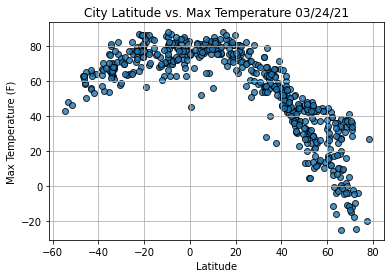

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incoroporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather_data/Fig1.png")

# Show plot
plt.show()

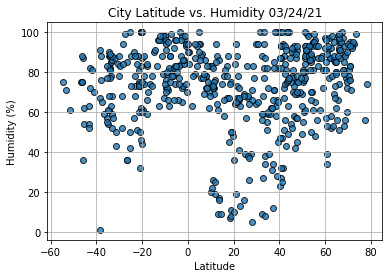

In [16]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incoroporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather_data/Fig2.png")

# Show plot
plt.show()

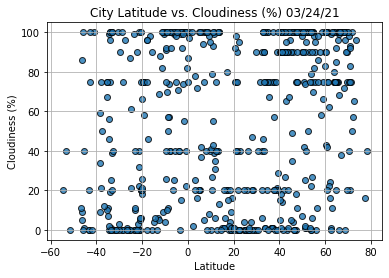

In [17]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incoroporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather_data/Fig3.png")

# Show plot
plt.show()

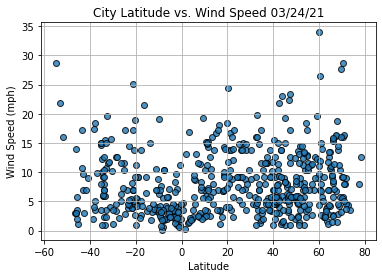

In [18]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incoroporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather_data/Fig4.png")

# Show plot
plt.show()